# Assignment 1 : Gym Members Exercise Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [3]:
#Read datset
data = pd.read_csv('gym_members_exercise_tracking.csv')
data

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [5]:
#display null values
data.isna().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [6]:
data = data.drop(['Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Water_Intake (liters)'], axis=1)

In [7]:
data.head()

,Age,Gender,Weight (kg),Height (m),Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,1.69,1313.0,Yoga,12.6,4,3,30.20
1,46,Female,74.9,1.53,1.30,883.0,HIIT,33.9,4,2,32.00
2,32,Female,68.1,1.66,1.11,677.0,Cardio,33.4,4,2,24.71
3,25,Male,53.2,1.70,0.59,532.0,Strength,28.8,3,1,18.41
4,38,Male,46.1,1.79,0.64,556.0,Strength,29.2,3,1,14.39


## Categorical Variables

In [8]:
#display workout type unique values
data.Workout_Type.unique()

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

In [9]:
#channging data metric
data['Weight'] = data['Weight (kg)'] * 2.20462
data['Height'] = data['Height (m)'] * 39.3701
data = data.drop(['Weight (kg)', 'Height (m)'], axis=1)

In [10]:
#display workout type counts
sum_type = data.Workout_Type.value_counts()
sum_type

Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

bar chart for workout type

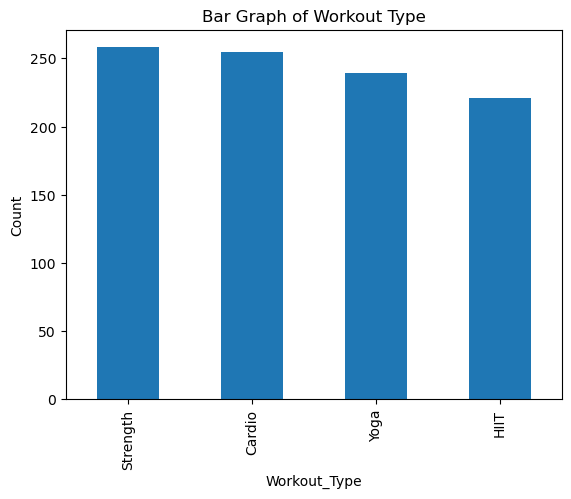

In [11]:
plt.figure()
ax = sum_type.plot(kind='bar')
ax.set_title("Bar Graph of Workout Type")
ax.set_ylabel("Count")
plt.show()

In [12]:
#display gender counts
sum_gender = data.Gender.value_counts()
sum_gender

Gender
Male      511
Female    462
Name: count, dtype: int64

bar chart for gender

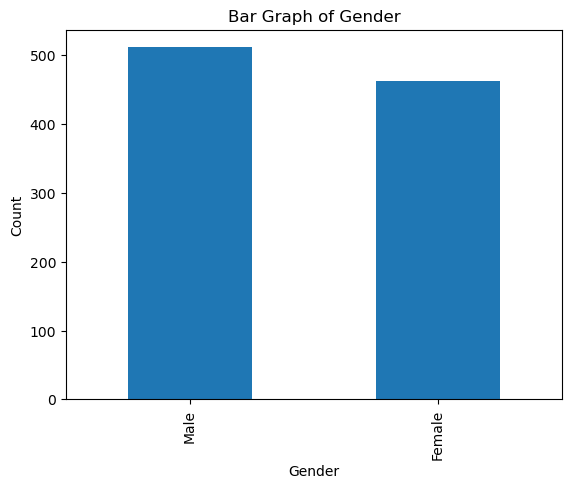

In [13]:
plt.figure()
ax = sum_gender.plot(kind='bar')
ax.set_title("Bar Graph of Gender")
ax.set_ylabel("Count")
plt.show()

In [14]:
#display exxperience level counts
sum_exlevel = data.Experience_Level.value_counts()
sum_exlevel

Experience_Level
2    406
1    376
3    191
Name: count, dtype: int64

bar chart of experience level

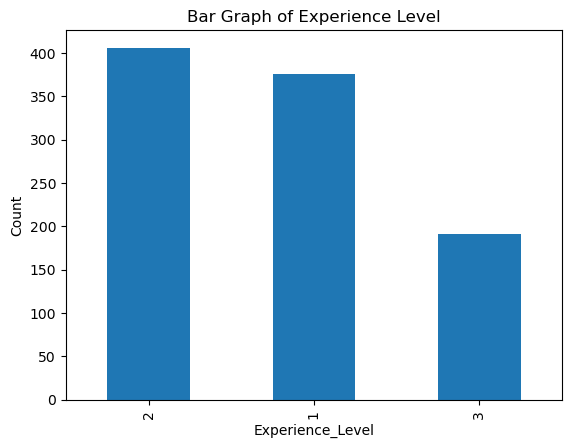

In [15]:
plt.figure()
ax = sum_exlevel.plot(kind='bar')
ax.set_title("Bar Graph of Experience Level")
ax.set_ylabel("Count")
plt.show()

In [16]:
#table of gender and experience level
workout_type_gender = data[["Gender","Experience_Level"]]
counts = pd.crosstab(data["Gender"],data["Experience_Level"])
counts

Experience_Level,1,2,3
Gender,,,
Female,179,193,90
Male,197,213,101


<Figure size 640x480 with 0 Axes>

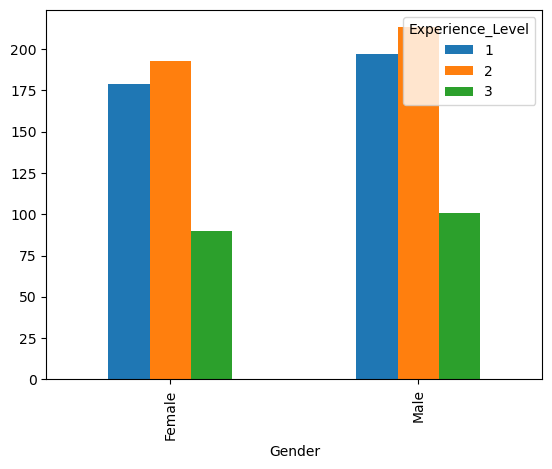

In [17]:
plt.figure()
counts.plot.bar(stacked=False)
plt.show()

In [18]:
#table of gender and workout type
workout_type_gender = data[["Gender","Workout_Type"]]
counts = pd.crosstab(data["Gender"],data["Workout_Type"])
counts

Workout_Type,Cardio,HIIT,Strength,Yoga
Gender,,,,
Female,126,107,123,106
Male,129,114,135,133


<Figure size 640x480 with 0 Axes>

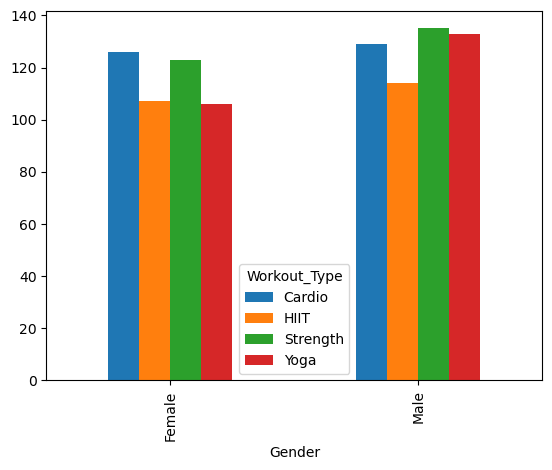

In [19]:
plt.figure()
counts.plot.bar(stacked=False)
plt.show()

In [20]:
#table of experience level and workout type
workout_type_gender = data[["Experience_Level","Workout_Type"]]
counts = pd.crosstab(data["Experience_Level"],data["Workout_Type"])
counts

Workout_Type,Cardio,HIIT,Strength,Yoga
Experience_Level,,,,
1,109,85,97,85
2,102,87,116,101
3,44,49,45,53


<Figure size 640x480 with 0 Axes>

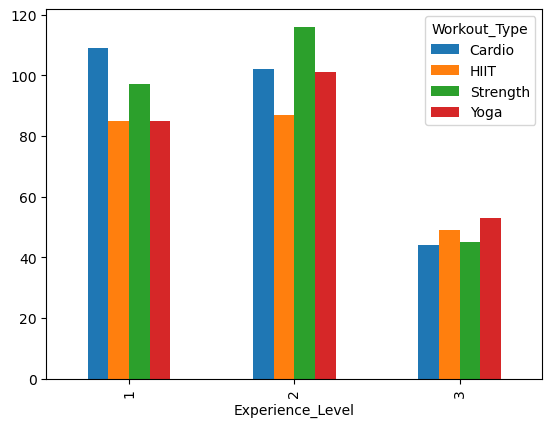

In [21]:
plt.figure()
counts.plot.bar(stacked=False)
plt.show()

In [22]:
#display freq counts
sum_freq = data['Workout_Frequency (days/week)'].value_counts()
sum_freq

Workout_Frequency (days/week)
3    368
4    306
2    197
5    102
Name: count, dtype: int64

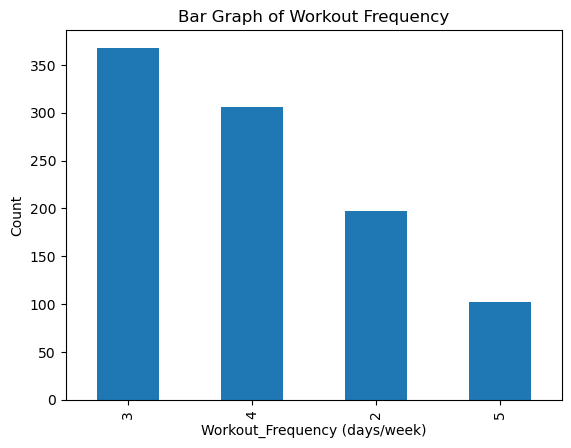

In [23]:
plt.figure()
ax = sum_freq.plot(kind='bar')
ax.set_title("Bar Graph of Workout Frequency")
ax.set_ylabel("Count")
plt.show()

In [24]:
workout_type_gender = data[["Gender","Workout_Frequency (days/week)"]]
counts = pd.crosstab(data["Gender"],data["Workout_Frequency (days/week)"])
counts

Workout_Frequency (days/week),2,3,4,5
Gender,,,,
Female,87,178,150,47
Male,110,190,156,55


<Figure size 640x480 with 0 Axes>

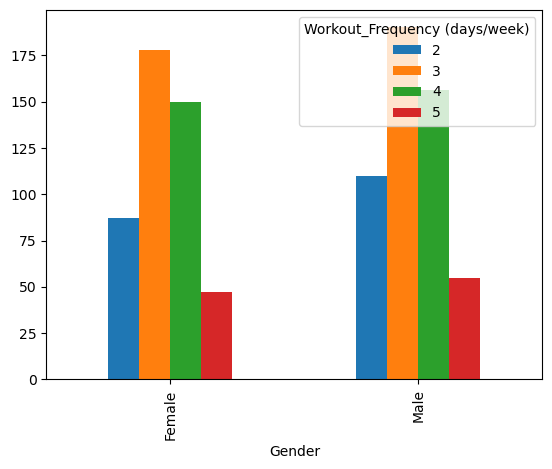

In [25]:
plt.figure()
counts.plot.bar(stacked=False)
plt.show()

In [26]:
workout_type_gender = data[["Workout_Frequency (days/week)","Workout_Type"]]
counts = pd.crosstab(data["Workout_Frequency (days/week)"],data["Workout_Type"])
counts

Workout_Type,Cardio,HIIT,Strength,Yoga
Workout_Frequency (days/week),,,,
2,63,42,45,47
3,92,86,102,88
4,77,67,85,77
5,23,26,26,27


<Figure size 640x480 with 0 Axes>

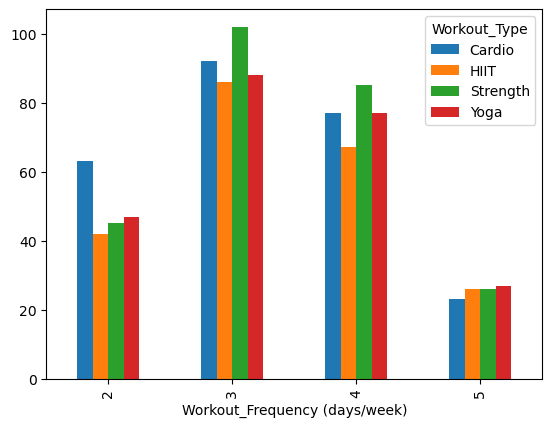

In [27]:
plt.figure()
counts.plot.bar(stacked=False)
plt.show()

In [28]:
workout_type_gender = data[["Experience_Level","Workout_Frequency (days/week)"]]
counts = pd.crosstab(data["Experience_Level"],data["Workout_Frequency (days/week)"])
counts

Workout_Frequency (days/week),2,3,4,5
Experience_Level,,,,
1,197,179,0,0
2,0,189,217,0
3,0,0,89,102


<Figure size 640x480 with 0 Axes>

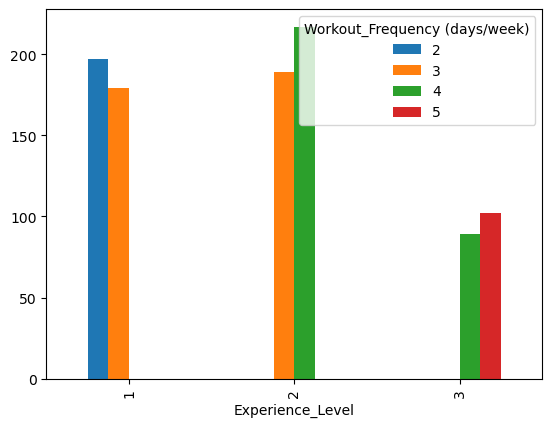

In [29]:
plt.figure()
counts.plot.bar(stacked=False)
plt.show()

Text(0.5, 1.0, 'Histogram of Age')

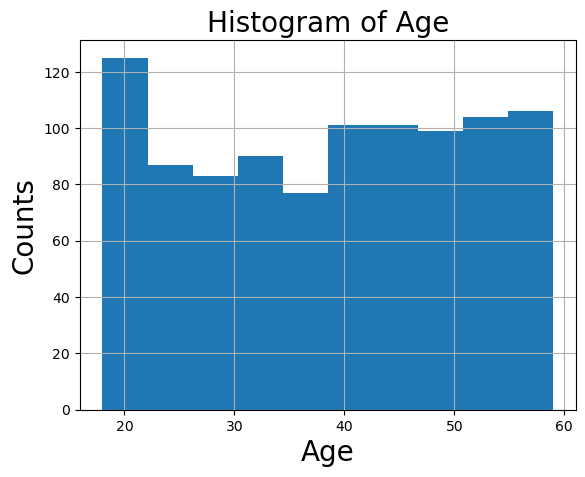

In [30]:
ax = data.Age.hist()
ax.set_xlabel("Age",fontsize=20)
ax.set_ylabel("Counts",fontsize=20)
ax.set_title("Histogram of Age",fontsize=20)

## Numerical Variables

In [31]:
print(data.columns)

Index(['Age', 'Gender', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI', 'Weight', 'Height'],
      dtype='object')


In [32]:
data_num = data.drop(['Gender', 'Workout_Type', 'Experience_Level', 'Workout_Frequency (days/week)'], axis=1)

In [33]:
data_num.head()

,Age,Session_Duration (hours),Calories_Burned,Fat_Percentage,BMI,Weight,Height
0,56,1.69,1313.0,12.6,30.20,194.667946,67.322871
1,46,1.30,883.0,33.9,32.00,165.126038,60.236253
2,32,1.11,677.0,33.4,24.71,150.134622,65.354366
3,25,0.59,532.0,28.8,18.41,117.285784,66.929170
4,38,0.64,556.0,29.2,14.39,101.632982,70.472479


Text(0.5, 1.0, 'Scatterplot of Weight by Height')

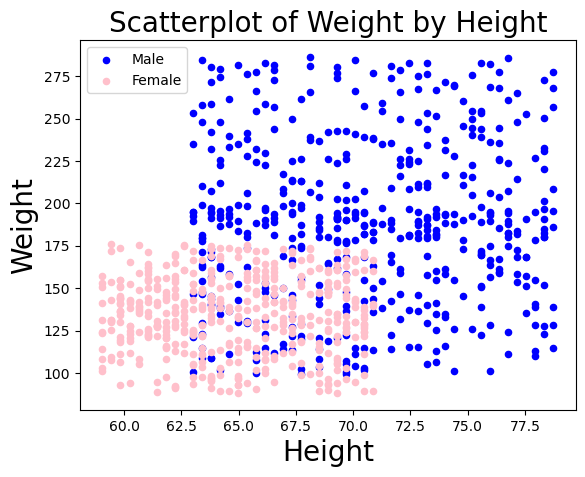

In [34]:
#Create a Scatterplot
ax = data[data['Gender'] == 'Male'].plot.scatter('Height', 'Weight', color='blue', label='Male', ax=None)
data[data['Gender'] == 'Female'].plot.scatter('Height', 'Weight', color='pink', label='Female', ax=ax)
ax.set_xlabel("Height",fontsize=20)
ax.set_ylabel("Weight",fontsize=20)
ax.set_title("Scatterplot of Weight by Height",fontsize=20)

Text(0.5, 1.0, 'Scatterplot of Duration by Calories Burned')

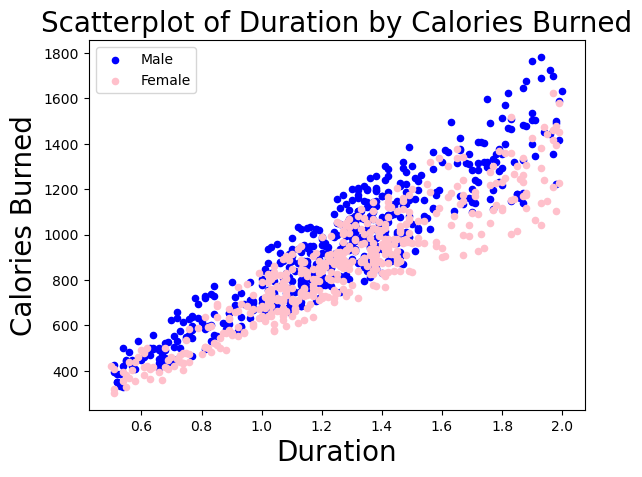

In [35]:
ax = data[data['Gender'] == 'Male'].plot.scatter('Session_Duration (hours)', 'Calories_Burned', color='blue', label='Male', ax=None)
data[data['Gender'] == 'Female'].plot.scatter('Session_Duration (hours)', 'Calories_Burned', color='pink', label='Female', ax=ax)
ax.set_xlabel("Duration",fontsize=20)
ax.set_ylabel("Calories Burned",fontsize=20)
ax.set_title("Scatterplot of Duration by Calories Burned",fontsize=20)

Text(0.5, 1.0, 'Scatterplot of Duration by Calories Burned')

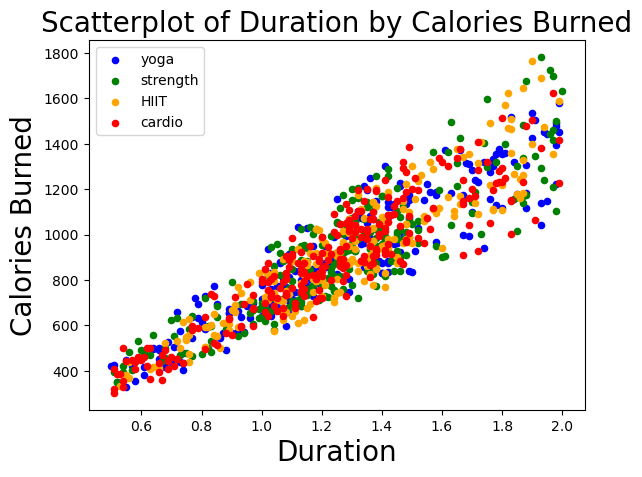

In [36]:
ax = data[data['Workout_Type'] == 'Yoga'].plot.scatter('Session_Duration (hours)', 'Calories_Burned', color='blue', label='yoga', ax=None)
data[data['Workout_Type'] == 'Strength'].plot.scatter('Session_Duration (hours)', 'Calories_Burned', color='green', label='strength', ax=ax)
data[data['Workout_Type'] == 'HIIT'].plot.scatter('Session_Duration (hours)', 'Calories_Burned', color='orange', label='HIIT', ax=ax)
data[data['Workout_Type'] == 'Cardio'].plot.scatter('Session_Duration (hours)', 'Calories_Burned', color='red', label='cardio', ax=ax)
ax.set_xlabel("Duration",fontsize=20)
ax.set_ylabel("Calories Burned",fontsize=20)
ax.set_title("Scatterplot of Duration by Calories Burned",fontsize=20)

Text(0.5, 1.0, 'Scatterplot of Duration by Calories Burned')

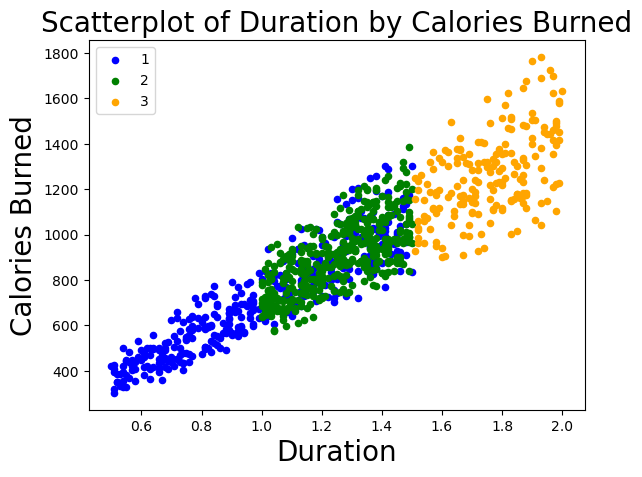

In [37]:
ax = data[data['Experience_Level'] == 1].plot.scatter('Session_Duration (hours)', 'Calories_Burned', color='blue', label='1', ax=None)
data[data['Experience_Level'] == 2].plot.scatter('Session_Duration (hours)', 'Calories_Burned', color='green', label='2', ax=ax)
data[data['Experience_Level'] == 3].plot.scatter('Session_Duration (hours)', 'Calories_Burned', color='orange', label='3', ax=ax)
ax.set_xlabel("Duration",fontsize=20)
ax.set_ylabel("Calories Burned",fontsize=20)
ax.set_title("Scatterplot of Duration by Calories Burned",fontsize=20)

Text(0.5, 1.0, 'Scatterplot of Fat Percenatage by Calories Burned')

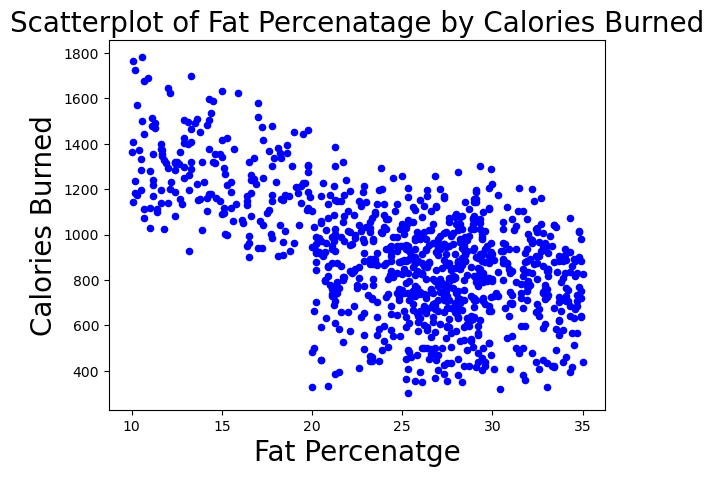

In [38]:
ax = data_num.plot.scatter('Fat_Percentage', 'Calories_Burned', color='blue', ax=None)
ax.set_xlabel("Fat Percenatge",fontsize=20)
ax.set_ylabel("Calories Burned",fontsize=20)
ax.set_title("Scatterplot of Fat Percenatage by Calories Burned",fontsize=20)

Text(0.5, 1.0, 'Scatterplot of Duration by Calories Burned')

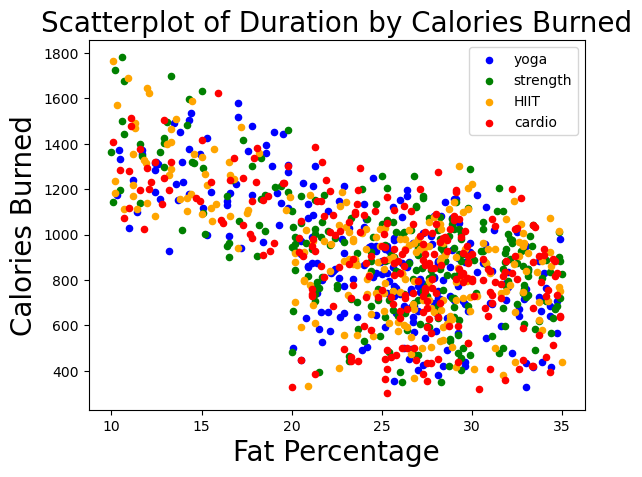

In [39]:
ax = data[data['Workout_Type'] == 'Yoga'].plot.scatter('Fat_Percentage', 'Calories_Burned', color='blue', label='yoga', ax=None)
data[data['Workout_Type'] == 'Strength'].plot.scatter('Fat_Percentage', 'Calories_Burned', color='green', label='strength', ax=ax)
data[data['Workout_Type'] == 'HIIT'].plot.scatter('Fat_Percentage', 'Calories_Burned', color='orange', label='HIIT', ax=ax)
data[data['Workout_Type'] == 'Cardio'].plot.scatter('Fat_Percentage', 'Calories_Burned', color='red', label='cardio', ax=ax)
ax.set_xlabel("Fat Percentage",fontsize=20)
ax.set_ylabel("Calories Burned",fontsize=20)
ax.set_title("Scatterplot of Duration by Calories Burned",fontsize=20)

Text(0.5, 1.0, 'Scatterplot of Duration by Calories Burned')

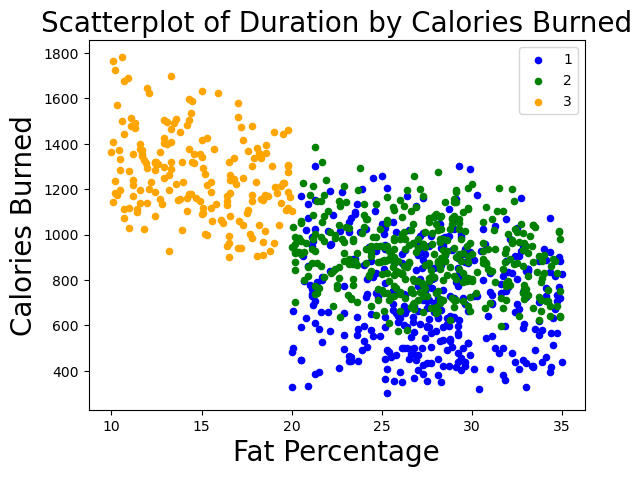

In [40]:
ax = data[data['Experience_Level'] == 1].plot.scatter('Fat_Percentage', 'Calories_Burned', color='blue', label='1', ax=None)
data[data['Experience_Level'] == 2].plot.scatter('Fat_Percentage', 'Calories_Burned', color='green', label='2', ax=ax)
data[data['Experience_Level'] == 3].plot.scatter('Fat_Percentage', 'Calories_Burned', color='orange', label='3', ax=ax)
ax.set_xlabel("Fat Percentage",fontsize=20)
ax.set_ylabel("Calories Burned",fontsize=20)
ax.set_title("Scatterplot of Duration by Calories Burned",fontsize=20)

Text(0.5, 1.0, 'Scatterplot of BMI by Calories Burned')

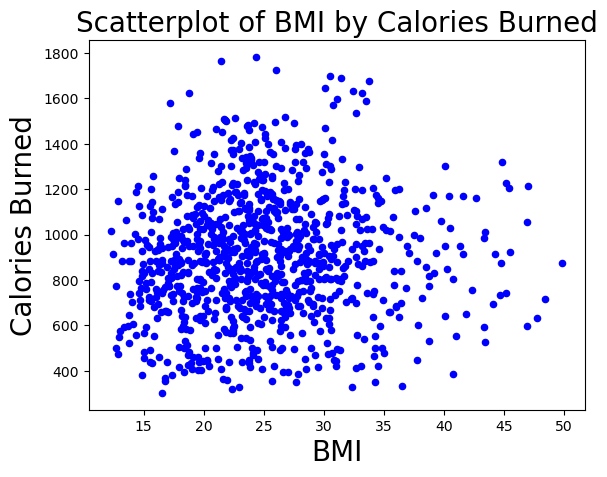

In [41]:
ax = data_num.plot.scatter('BMI', 'Calories_Burned', color='blue', ax=None)
ax.set_xlabel("BMI",fontsize=20)
ax.set_ylabel("Calories Burned",fontsize=20)
ax.set_title("Scatterplot of BMI by Calories Burned",fontsize=20)

Text(0.5, 1.0, 'Scatterplot of Fat Percnetage by Duration')

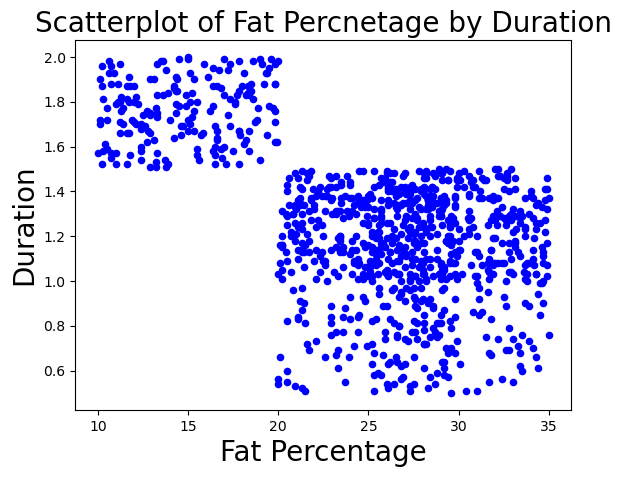

In [42]:
ax = data_num.plot.scatter('Fat_Percentage', 'Session_Duration (hours)', color='blue', ax=None)
ax.set_xlabel("Fat Percentage",fontsize=20)
ax.set_ylabel("Duration",fontsize=20)
ax.set_title("Scatterplot of Fat Percnetage by Duration",fontsize=20)

Text(0.5, 1.0, 'Scatterplot of Fat Percnetage by BMI')

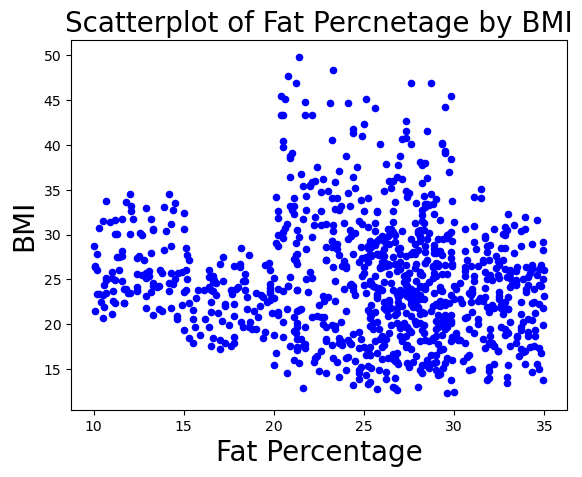

In [43]:
ax = data_num.plot.scatter('Fat_Percentage', 'BMI', color='blue', ax=None)
ax.set_xlabel("Fat Percentage",fontsize=20)
ax.set_ylabel("BMI",fontsize=20)
ax.set_title("Scatterplot of Fat Percnetage by BMI",fontsize=20)

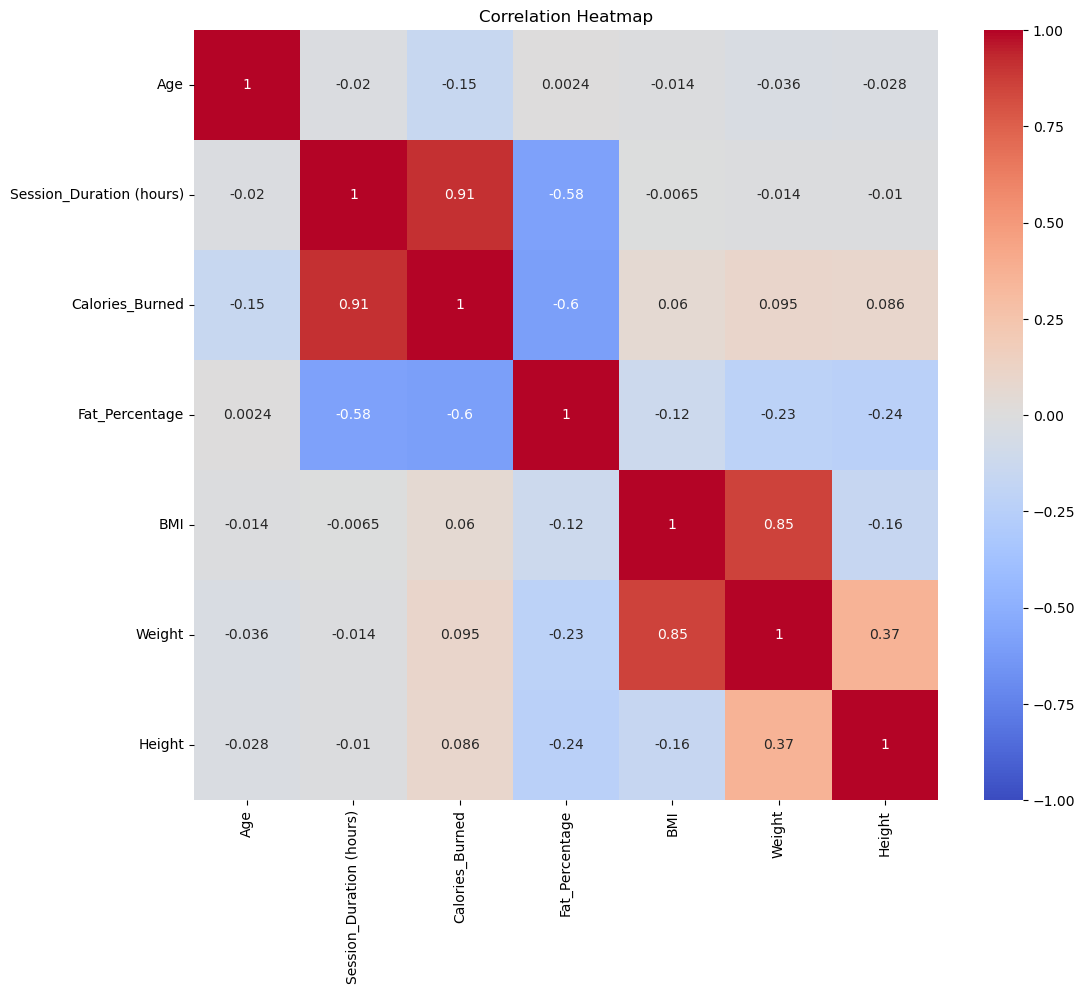

In [44]:
numerical_data = data_num.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

## Classification of Workout Type

In [45]:
data_men = data[data['Gender'] == 'Male']
data_women = data[data['Gender'] == 'Female']

In [46]:
X_men = data_men.drop(["Workout_Type", "Gender","BMI","Workout_Frequency (days/week)"], axis=1)
X_men.head()

,Age,Session_Duration (hours),Calories_Burned,Fat_Percentage,Experience_Level,Weight,Height
0,56,1.69,1313.0,12.6,3,194.667946,67.322871
3,25,0.59,532.0,28.8,1,117.285784,66.929170
4,38,0.64,556.0,29.2,1,101.632982,70.472479
6,36,1.49,1385.0,21.3,2,154.984786,67.716572
8,28,1.03,719.0,28.9,2,268.302254,76.377994


In [47]:
X_women = data_women.drop(["Workout_Type", "Gender","BMI","Workout_Frequency (days/week)"], axis=1)
X_women.head()

,Age,Session_Duration (hours),Calories_Burned,Fat_Percentage,Experience_Level,Weight,Height
1,46,1.30,883.0,33.9,2,165.126038,60.236253
2,32,1.11,677.0,33.4,2,150.134622,65.354366
5,56,1.59,1116.0,15.5,3,127.867960,66.141768
7,40,1.27,895.0,30.6,2,153.662014,59.448851
15,39,1.13,740.0,26.2,1,93.696350,68.897675


In [48]:
y_men = data_men["Workout_Type"]
y_men.head()

0        Yoga
3    Strength
4    Strength
6      Cardio
8    Strength
Name: Workout_Type, dtype: object

In [49]:
y_women = data_women["Workout_Type"]
y_women.head()

1         HIIT
2       Cardio
5         HIIT
7       Cardio
15    Strength
Name: Workout_Type, dtype: object

In [50]:
X_train_men, X_test_men, y_train_men, y_test_men = train_test_split(X_men, y_men, test_size=0.3)
X_train_women, X_test_women, y_train_women, y_test_women = train_test_split(X_women, y_women)

In [51]:
clf_men = KNeighborsClassifier(n_neighbors=35)
clf_men.fit(X_train_men, y_train_men)

KNeighborsClassifier(n_neighbors=35)

In [52]:
y_pred_men = clf_men.predict(X_test_men)
y_pred_men

acc_men = accuracy_score(y_test_men, y_pred_men)
print("Accuracy:", acc_men)

Accuracy: 0.2662337662337662


In [53]:
clf_women = KNeighborsClassifier(n_neighbors=50)
clf_women.fit(X_train_women, y_train_women)

KNeighborsClassifier(n_neighbors=50)

In [54]:
y_pred_women = clf_women.predict(X_test_women)
y_pred_women

acc_women = accuracy_score(y_test_women, y_pred_women)
print("Accuracy:", acc_women)

Accuracy: 0.1896551724137931


In [55]:
#decision tree
dtc_men = DecisionTreeClassifier(random_state=0)
dtc_men.fit(X_train_men, y_train_men)

DecisionTreeClassifier(random_state=0)

In [56]:
y_pred_men = dtc_men.predict(X_test_men)
y_pred_men

acc_men = accuracy_score(y_test_men, y_pred_men)
print("Accuracy:", acc_men)

Accuracy: 0.19480519480519481


In [57]:
dtc_women = DecisionTreeClassifier(random_state=0)
dtc_women.fit(X_train_women, y_train_women)

DecisionTreeClassifier(random_state=0)

In [58]:
y_pred_women = dtc_women.predict(X_test_women)
y_pred_women

acc_women = accuracy_score(y_test_women, y_pred_women)
print("Accuracy:", acc_women)

Accuracy: 0.1724137931034483


In [59]:
#log regression
cls_men = LogisticRegression()
cls_men.fit(X_train_men, y_train_men)

C:\Users\jamar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_pred_men = cls_men.predict(X_test_men)
score_men = accuracy_score(y_pred_men, y_test_men)
score_men

0.2077922077922078

In [61]:
cls_women = LogisticRegression()
cls_women.fit(X_train_women, y_train_women)

C:\Users\jamar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
y_pred_women = cls_men.predict(X_test_women)
score_women = accuracy_score(y_pred_women, y_test_women)
score_women

0.23275862068965517